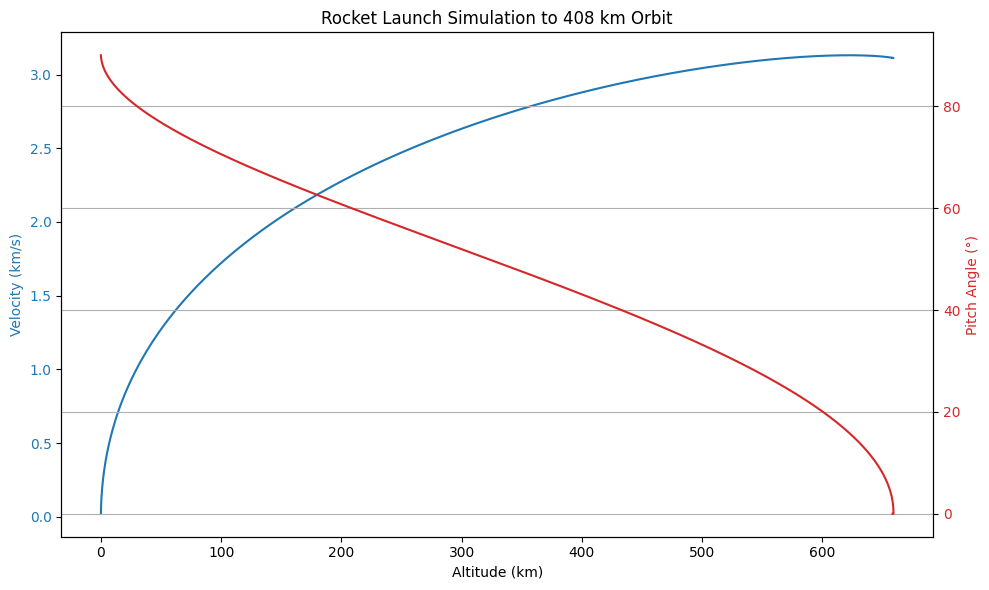

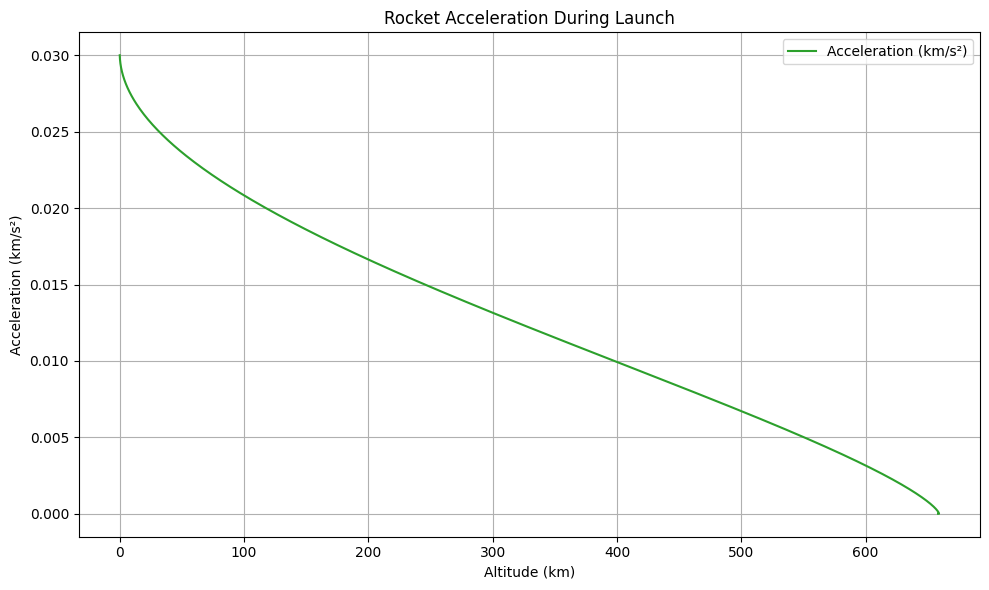

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g0 = 9.81  # Gravity at sea level (m/s^2)
R_earth = 6371e3  # Radius of Earth in meters
target_altitude = 408e3  # Target orbit altitude in meters
target_velocity = 7670  # Approx orbital velocity at 408 km (m/s)
time_end = 600  # Total time of simulation in seconds
dt = 1  # Time step in seconds
times = np.arange(0, time_end, dt)

# Initial conditions
altitude = 0
velocity = 0
pitch = 90  # degrees
altitudes = []
velocities = []
pitches = []
accelerations = []


# Parameters for simulation
max_acceleration = 30  # m/s^2 (typical near end of 1st stage)
burn_time = 500  # Total burn duration in seconds

for t in times:
    if t < burn_time:
        # Acceleration linearly increasing and then tapering off
        acceleration = max_acceleration * (1 - t / burn_time)**1.5
    else:
        acceleration = 0  # engine cutoff

    # Simple gravity turn: pitch decreases over time
    pitch = max(0, 90 - t * 0.18)  # ~0° at 500 s

    # Resolve acceleration into vertical and horizontal
    acc_rad = np.radians(pitch)
    vertical_acc = acceleration * np.sin(acc_rad) - g0 * (R_earth / (R_earth + altitude))**2
    horizontal_acc = acceleration * np.cos(acc_rad)

    # Update velocity and altitude
    vertical_velocity = velocity * np.sin(acc_rad) + vertical_acc * dt
    horizontal_velocity = velocity * np.cos(acc_rad) + horizontal_acc * dt
    velocity = np.sqrt(vertical_velocity**2 + horizontal_velocity**2)
    altitude += vertical_velocity * dt

    altitudes.append(altitude / 1000)  # convert to km
    velocities.append(velocity / 1000)  # convert to km/s
    accelerations.append(acceleration / 1000)  # convert to km/s^2
    pitches.append(pitch)

# Plotting results
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel("Altitude (km)")
ax1.set_ylabel("Velocity (km/s)", color='tab:blue')
ax1.plot(altitudes, velocities, label="Velocity", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
ax2.set_ylabel("Pitch Angle (°)", color='tab:red')
ax2.plot(altitudes, pitches, label="Pitch", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Rocket Launch Simulation to 408 km Orbit")
fig.tight_layout()
plt.grid(True)
plt.show()

# Plotting acceleration
plt.figure(figsize=(10, 6))
plt.plot(altitudes, accelerations, label="Acceleration (km/s²)", color='tab:green')
plt.xlabel("Altitude (km)")
plt.ylabel("Acceleration (km/s²)")
plt.title("Rocket Acceleration During Launch")

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


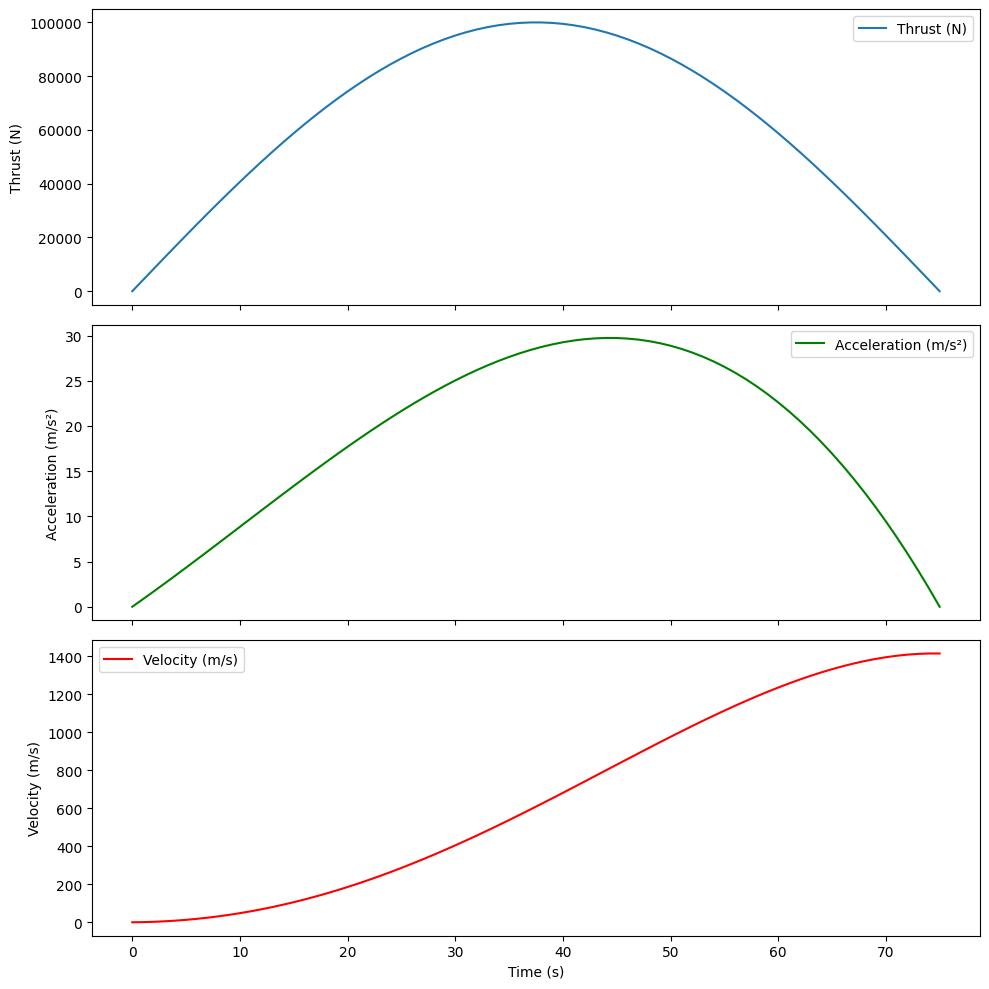

(np.float64(75.0), np.float64(1415.4386284285752))

In [15]:
m0 = 5000  # initial mass (kg)
mf = 2000  # final mass (kg)
ve = 2500  # exhaust velocity (m/s)
tb_est = 75  # estimated burn time (s)
F_max = 100000  # maximum thrust (N)

# Time step and array
dt = 1.0  # seconds
time = np.arange(0, tb_est + dt, dt)
n_steps = len(time)

# Initialize arrays
mass = np.zeros(n_steps)
thrust = np.zeros(n_steps)
acceleration = np.zeros(n_steps)
velocity = np.zeros(n_steps)

mass[0] = m0
delta_m = m0 - mf
mdot_avg = delta_m / tb_est  # average mass flow rate

# Simulation loop
for i in range(1, n_steps):
    t = time[i]
    
    # Thrust curve: sin-shaped (0 -> max -> 0)
    thrust[i] = F_max * np.sin(np.pi * t / tb_est)
    
    # Update mass linearly
    mass[i] = mass[i - 1] - mdot_avg * dt
    if mass[i] < mf:
        mass[i] = mf
        thrust[i] = 0  # stop thrusting when fuel runs out
    
    # Compute acceleration
    acceleration[i] = thrust[i] / mass[i] if mass[i] > 0 else 0
    
    # Update velocity
    velocity[i] = velocity[i - 1] + acceleration[i] * dt

# Final values
final_burn_time = time[np.where(mass == mf)[0][0]]
final_velocity = velocity[np.where(mass == mf)[0][0]]

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, thrust, label="Thrust (N)")
axs[0].set_ylabel("Thrust (N)")
axs[0].legend()

axs[1].plot(time, acceleration, label="Acceleration (m/s²)", color='green')
axs[1].set_ylabel("Acceleration (m/s²)")
axs[1].legend()

axs[2].plot(time, velocity, label="Velocity (m/s)", color='red')
axs[2].set_ylabel("Velocity (m/s)")
axs[2].set_xlabel("Time (s)")
axs[2].legend()

plt.tight_layout()
plt.show()

final_burn_time, final_velocity
